In [ ]:
%matplotlib inline


# Plot multinomial and One-vs-Rest Logistic Regression


Plot decision surface of multinomial and One-vs-Rest Logistic Regression.
The hyperplanes corresponding to the three One-vs-Rest (OVR) classifiers
are represented by the dashed lines.


Automatically created module for IPython interactive environment
[0 0 0 2 1 1 0 0 0 1 2 2 2 1 1 1 1 2 0 2 0 1 0 1 1 2 0 1 1 1 2 0 2 0 2 1 2
 2 0 0 1 0 0 0 1 2 0 0 0 2 0 0 0 1 1 0 1 2 0 1 2 1 2 2 0 1 1 0 1 0 1 2 1 1
 0 2 1 2 0 0 1 1 2 0 0 2 1 2 1 2 2 2 1 1 2 2 0 0 0 0 2 2 0 1 0 0 1 2 2 1 2
 1 0 1 1 2 0 2 1 1 0 1 2 2 2 0 0 1 0 2 0 2 2 1 2 1 0 1 2 2 2 2 2 1 1 1 1 2
 2 2 1 2 1 0 0 1 1 1 1 1 2 0 0 1 2 2 2 0 1 2 1 1 1 0 1 2 0 2 2 0 2 2 1 1 2
 0 1 0 0 2 1 1 0 1 0 1 1 0 0 0 1 2 2 1 0 0 1 0 1 1 2 0 0 0 1 2 1 2 1 2 0 2
 1 1 0 2 2 1 1 1 0 0 2 2 2 0 2 2 2 2 1 0 2 2 1 0 2 2 0 0 2 0 2 0 2 0 2 0 2
 2 0 1 1 1 1 2 1 1 1 2 1 2 0 1 2 0 0 2 2 2 0 2 0 0 1 1 1 2 1 0 2 0 0 0 2 2
 0 2 2 1 2 0 0 2 1 1 1 0 1 2 2 2 0 0 2 0 0 1 1 0 0 0 0 0 2 2 1 2 2 1 2 1 1
 2 0 0 1 0 0 2 2 1 1 0 1 0 0 2 2 2 1 1 2 0 0 2 2 2 1 1 0 1 2 1 1 2 1 2 0 0
 0 2 1 0 1 1 1 1 1 1 2 0 1 0 1 2 2 0 2 1 2 1 2 2 0 1 2 1 0 0 1 2 2 0 2 1 0
 2 2 1 0 1 1 2 1 2 2 1 2 0 1 2 0 2 1 2 0 1 2 2 1 0 0 2 1 2 1 0 0 1 1 2 2 1
 1 0 0 2 0 2 0 0 0 0 1 0 0 0 2 0 2 

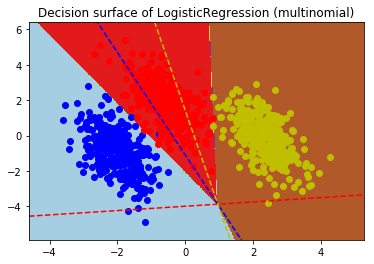

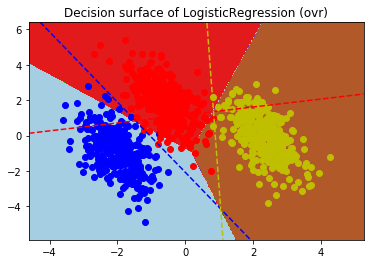

In [21]:
print(__doc__)
# Authors: Tom Dupre la Tour <tom.dupre-la-tour@m4x.org>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

for multi_class in ('multinomial', 'ovr'):
    print y
    print X
    clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,
                             multi_class=multi_class).fit(X, y)

    # print the training scores
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    print Z
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

    # Plot also the training points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired)

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.show()

In [19]:
import numpy as np
from sklearn import linear_model, datasets
from sklearn.cross_validation import train_test_split

# 1.加载数据
iris = datasets.load_iris()
X = iris.data[:, :2]  # 使用前两个特征
Y = iris.target
#np.unique(Y)   # out: array([0, 1, 2])

# 2.拆分测试集、训练集。
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
# 设置随机数种子，以便比较结果。

# 3.标准化特征值
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print X_train
print Y_train
# 4. 训练逻辑回归模型
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train, Y_train)

# 5. 预测
prepro = logreg.predict_proba(X_test_std)
acc = logreg.score(X_test_std,Y_test)
print acc

[[ 5.   2. ]
 [ 6.5  3. ]
 [ 6.7  3.3]
 [ 6.   2.2]
 [ 6.7  2.5]
 [ 5.6  2.5]
 [ 7.7  3. ]
 [ 6.3  3.3]
 [ 5.5  2.4]
 [ 6.3  2.7]
 [ 6.3  2.8]
 [ 4.9  2.5]
 [ 6.3  2.5]
 [ 7.   3.2]
 [ 6.5  3. ]
 [ 6.   3.4]
 [ 4.8  3.1]
 [ 5.8  2.7]
 [ 5.6  2.7]
 [ 5.6  2.9]
 [ 5.5  2.5]
 [ 6.1  3. ]
 [ 7.2  3.2]
 [ 5.3  3.7]
 [ 4.3  3. ]
 [ 6.4  2.7]
 [ 5.7  3. ]
 [ 5.4  3.4]
 [ 5.7  4.4]
 [ 6.9  3.1]
 [ 4.6  3.1]
 [ 5.9  3. ]
 [ 5.1  2.5]
 [ 4.6  3.4]
 [ 6.2  2.2]
 [ 7.2  3.6]
 [ 5.7  2.9]
 [ 4.8  3. ]
 [ 7.1  3. ]
 [ 6.9  3.2]
 [ 6.5  3. ]
 [ 6.4  2.8]
 [ 5.1  3.8]
 [ 4.8  3.4]
 [ 6.5  3.2]
 [ 6.7  3.3]
 [ 4.5  2.3]
 [ 6.2  3.4]
 [ 4.9  3. ]
 [ 5.7  2.5]
 [ 6.9  3.1]
 [ 4.4  3.2]
 [ 5.   3.6]
 [ 7.2  3. ]
 [ 5.1  3.5]
 [ 4.4  3. ]
 [ 5.4  3.9]
 [ 5.5  2.3]
 [ 6.8  3.2]
 [ 7.6  3. ]
 [ 5.1  3.5]
 [ 4.9  3.1]
 [ 5.2  3.4]
 [ 5.7  2.8]
 [ 6.6  3. ]
 [ 5.   3.2]
 [ 5.1  3.3]
 [ 6.4  2.9]
 [ 5.4  3.4]
 [ 7.7  2.6]
 [ 4.9  2.4]
 [ 7.9  3.8]
 [ 6.7  3.1]
 [ 5.2  4.1]
 [ 6.   3. ]
 [ 5.8  4. ]
 [ 7.7  2.8]